## Titanic Survivor Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfx=pd.read_csv("./Train.csv")

In [3]:
dfx.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [4]:
dftest=pd.read_csv("./Test.csv")

In [5]:
dftest.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0.0,0.0,PC 17474,26.3875,E25,S,5,NaN,"Brooklyn, NY"
1,3.0,"Sage, Miss. Constance Gladys",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
2,1.0,"Rood, Mr. Hugh Roscoe",male,NaN,0.0,0.0,113767,50.0000,A32,S,NaN,NaN,"Seattle, WA"
3,2.0,"Gillespie, Mr. William Henry",male,34.0,0.0,0.0,12233,13.0000,NaN,S,NaN,NaN,"Vancouver, BC"
4,2.0,"Collander, Mr. Erik Gustaf",male,28.0,0.0,0.0,248740,13.0000,NaN,S,NaN,NaN,"Helsinki, Finland Ashtabula, Ohio"


### Shape of Training and Testing

In [6]:
print(f"Training data : {dfx.shape}")
print(f"Training data : {dftest.shape}")

Training data : (1009, 14)
Training data : (300, 13)


### Check for NULL values of every column

In [7]:
total_null=[]
for col in dfx.columns:
    total_null.append((dfx[col].isnull().sum()/dfx.shape[0])*100)
    print(f"Percentage of NULL values in column {col} is : {(dfx[col].isnull().sum()/dfx.shape[0])*100}%")

Percentage of NULL values in column pclass is : 0.0%
Percentage of NULL values in column survived is : 0.0%
Percentage of NULL values in column name is : 0.0%
Percentage of NULL values in column sex is : 0.0%
Percentage of NULL values in column age is : 19.52428146679881%
Percentage of NULL values in column sibsp is : 0.0%
Percentage of NULL values in column parch is : 0.0%
Percentage of NULL values in column ticket is : 0.0%
Percentage of NULL values in column fare is : 0.09910802775024777%
Percentage of NULL values in column cabin is : 77.30426164519326%
Percentage of NULL values in column embarked is : 0.09910802775024777%
Percentage of NULL values in column boat is : 62.93359762140733%
Percentage of NULL values in column body is : 90.28741328047572%
Percentage of NULL values in column home.dest is : 42.319127849355795%


- **Body**,**Boat**,**home.dest**,**cabin** Has more Null vlues so its better to remove them

In [8]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
pclass       1009 non-null float64
survived     1009 non-null float64
name         1009 non-null object
sex          1009 non-null object
age          812 non-null float64
sibsp        1009 non-null float64
parch        1009 non-null float64
ticket       1009 non-null object
fare         1008 non-null float64
cabin        229 non-null object
embarked     1008 non-null object
boat         374 non-null object
body         98 non-null float64
home.dest    582 non-null object
dtypes: float64(7), object(7)
memory usage: 110.4+ KB


In [9]:
drop_col=[ 'name', 'cabin', 'boat', 'body', 'home.dest','sibsp','parch']
dfx=dfx.drop(drop_col,axis=1)
dfy=dfx['survived']

In [10]:
dfx.head(2)

,pclass,survived,sex,age,ticket,fare,embarked
0,3.0,0.0,female,NaN,364856,7.75,Q
1,2.0,0.0,male,39.0,250655,26.00,S


In [11]:
dfx.groupby('survived').size()

survived
0.0    627
1.0    382
dtype: int64

### Percentage of male and female survived

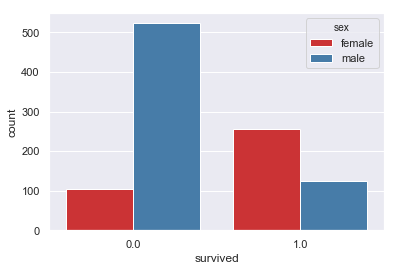

In [12]:
sns.set(style='darkgrid')
sns.countplot(x='survived',hue='sex',data=dfx,palette='Set1')
plt.show()

In [13]:
s=dict(dfx.groupby(["sex", "survived"]).size())
s

{('female', 0.0): 104,
 ('female', 1.0): 257,
 ('male', 0.0): 523,
 ('male', 1.0): 125}

In [14]:
print(f"Number of males : {(dfx['sex']=='male').sum()}")
print(f"Number of females : {(dfx['sex']=='female').sum()}")     
print(f"per of Male Survived : {s[('male',1)]/((dfx['sex']=='male').sum())*100} %")
print(f"per of Female Survived : {s[('female',1)]/((dfx['sex']=='female').sum())*100} %")

Number of males : 648
Number of females : 361
per of Male Survived : 19.290123456790123 %
per of Female Survived : 71.19113573407202 %


- More number of **females** are survived which means 71% will be your leaset accuracy if you predict female as survived

In [15]:
t=np.array(dftest['sex']=='female',dtype=int)

In [16]:
Id=np.arange(0,dftest.shape[0])
pred=pd.DataFrame({'Id':Id,'survived':t})
pred.to_csv("justguess.csv",index=False)   # giving me 80% accuracy

-Giving **80%** accuracy

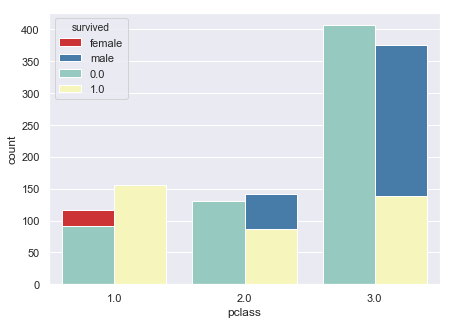

In [17]:
fig,ax=plt.subplots(1,1,figsize=(7,5))
sns.set(style='darkgrid')
sns.countplot(x='pclass',hue='sex',data=dfx,palette='Set1')
sns.countplot(x='pclass',hue='survived',data=dfx,palette='Set3')
plt.show()

In [18]:
dfx.groupby(['sex','pclass','survived']).size()

sex     pclass  survived
female  1.0     0.0           5
                1.0         111
        2.0     0.0           9
                1.0          66
        3.0     0.0          90
                1.0          80
male    1.0     0.0          86
                1.0          45
        2.0     0.0         121
                1.0          21
        3.0     0.0         316
                1.0          59
dtype: int64

### cleaning data

In [19]:
dfx=dfx.drop(['age','embarked','ticket'],axis=1)

In [20]:
dfx=dfx.drop(['survived'],axis=1)
dfx.head(2)

,pclass,sex,fare
0,3.0,female,7.75
1,2.0,male,26.00


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
dfx['sex']=le.fit_transform(dfx['sex'])

In [24]:
le.classes_

array(['female', 'male'], dtype=object)

In [25]:
dfx.head(2)

,pclass,sex,fare
0,3.0,0,7.75
1,2.0,1,26.00


In [26]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 3 columns):
pclass    1009 non-null float64
sex       1009 non-null int32
fare      1008 non-null float64
dtypes: float64(2), int32(1)
memory usage: 19.8 KB


### fillling of Null value 

In [27]:
dfx=dfx.fillna(dfx['fare'].mean())

In [28]:
X_train=dfx.values
Y_train=dfy.values
print(X_train.shape,Y_train.shape)

(1009, 3) (1009,)


### Dropping redundant column of test data

In [29]:
drop_col=['age','embarked','ticket','name', 'cabin', 'boat', 'body', 'home.dest','sibsp','parch']
dftest=dftest.drop(drop_col,axis=1)

In [30]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
pclass    300 non-null float64
sex       300 non-null object
fare      300 non-null float64
dtypes: float64(2), object(1)
memory usage: 7.1+ KB


In [31]:
dftest.head(2)

,pclass,sex,fare
0,1.0,male,26.3875
1,3.0,female,69.5500


In [32]:
dftest['sex']=le.fit_transform(dftest['sex'])

In [33]:
le.classes_

array(['female', 'male'], dtype=object)

In [34]:
dftest.head(2)

,pclass,sex,fare
0,1.0,1,26.3875
1,3.0,0,69.5500


In [35]:
X_test=dftest.values

### Using Logistic regression

In [36]:
from sklearn import linear_model

In [37]:
lr=linear_model.LogisticRegression()

In [38]:
lr.fit(X_train,Y_train)

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
lr_predict=lr.predict(X_test)

In [40]:
lr_predict=np.array(lr_predict,dtype=int)
lr_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [41]:
Id=np.arange(0,dftest.shape[0])
pred=pd.DataFrame({'Id':Id,'survived':lr_predict})
pred.to_csv("logistic_reg.csv",index=False)   # giving me 80% accuracy

### random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=14)

In [44]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rf.score(X_train,Y_train)

0.8830525272547076

In [46]:
rf_predict=rf.predict(X_test)

In [47]:
pred=pd.DataFrame({'Id':Id,'survived':rf_predict})
pred.to_csv("random_forest.csv",index=False)   # giving me 80% accuracy

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
acc=cross_val_score(rf,X_train,Y_train,cv=10).mean()
print(acc)

0.7739914579693264


In [50]:
acc_list=[]
for i in range(1,50):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=10),X_train,Y_train,cv=10).mean()
    acc_list.append(acc)

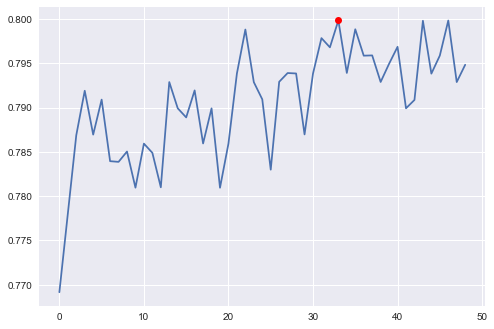

In [51]:
plt.style.use("seaborn")
plt.plot(acc_list)
plt.plot(np.argmax(acc_list),acc_list[np.argmax(acc_list)],marker='o',color='red')
plt.show()

In [52]:
acc_list[np.argmax(acc_list)]

0.7998332362648031

### Sctatch building a  decision trees Algorithm

- Entropy Formula

h(x)=-$\sum_{i=1}^{n} p_i*$log2$p_i$

In [95]:
dfx['survived']=dfy

In [97]:
dfx.head(2)

,pclass,sex,fare,survived
0,3.0,0,7.75,0.0
1,2.0,1,26.00,0.0


In [102]:
X=dfx.drop(['survived'],axis=1)

In [113]:
X.head(2)

,pclass,sex,fare
0,3.0,0,7.75
1,2.0,1,26.00


In [53]:

def entropy(col):
    
    counts=np.unique(col,return_counts=True)
    N=col.shape[0]
    entropy=0.0
    for ix in counts[1]:
        p=ix/N
        entropy+=(-1.0*p*np.log2(p))
    return entropy

In [93]:
def divide_data(dfx,f_col,f_val):
    
    x_left=pd.DataFrame([],columns=dfx.columns)
    x_right=pd.DataFrame([],columns=dfx.columns)
    
    for ix in range(dfx.shape[0]):
        val=dfx[f_col].loc[ix]
        
        if val>f_val:
            x_right=x_right.append(dfx.loc[ix])
        else:
            x_left=x_left.append(dfx.loc[ix])
            
    return x_left,x_right

In [94]:
x_left,x_right=divide_data(dfx[:10],'sex',0)
print(x_left)

   pclass  sex     fare
0     3.0  0.0   7.7500
2     2.0  0.0  13.0000
3     3.0  0.0  20.5250
4     3.0  0.0  23.2500
7     1.0  0.0  25.9292


In [100]:
def information_gain(dfx,f_col,f_val):
    
    left,right=divide_data(dfx,f_col,f_val)
    
    l=(left.shape[0]/dfx.shape[0])
    r=(right.shape[0]/dfx.shape[0])
    
    if left.shape[0]==0 or right.shape[0]==0:
        return -100000   # minimum information gain
    i_gain=entropy(dfx.survived)-(l*entropy(left.survived)+r*entropy(right.survived))
    
    return i_gain
    

In [103]:
print("Information gain : ->")
for fx in X.columns:
    print(f"{fx} --> {information_gain(dfx,fx,dfx[fx].mean())}")

Information gain : ->
pclass --> 0.055456910002982474
sex --> 0.19274737190850932
fare --> 0.04242793401428169


In [153]:
class decisionTree:
    
    def __init__(self,depth=0,max_depth=5):
        
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.target=None
        self.depth=depth
        self.max_depth=max_depth
        
    def train(self,X_train):
        
        features=['pclass','sex','fare']
        
        info_gain=[]
        for ix in features:
            i_gain=information_gain(X_train,ix,X_train[ix].mean())
            info_gain.append(i_gain)
                
        self.fkey=features[np.argmax(info_gain)]
        
        self.fval=X_train[self.fkey].mean()
        
        data_left,data_right=divide_data(X_train,self.fkey,self.fval)
        
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        # truely a leaf Node
        
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if X_train.survived.mean()>=0.5:
                self.target='survived'
            else:
                self.target='dead'
                
            return
    
    
    # stop early if depth >=max_depth
    
        if(self.depth>=self.max_depth):
            if X_train.survived.mean()>=0.5:
                self.target='survived'
            else:
                self.target='dead'

            return
        
    #recursive case
    
        self.left=decisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)

        self.right=decisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
    
    # set target at every node
    
        if X_train.survived.mean()>=0.5:
            
            self.target='survived'
        else:
            self.target='dead'

        return
    
    def predict(self,test):
        
        if test[self.fkey]>self.fval:
            
            # go to the right
            
            if self.right is None:
                
                return self.target
            
            return self.right.predict(test)
        else:
            
            if self.left is None:

                return self.target

            return self.left.predict(test)
    
    

In [154]:
dt=decisionTree()

In [155]:
dt.train(dfx)

In [143]:
dt.right.fkey

'fare'

In [156]:
y_pred=[]
for ix in range(dftest.shape[0]):
    y_pred.append(dt.predict(dftest.loc[ix]))

In [158]:
y_pred[:5]

['dead', 'dead', 'dead', 'dead', 'dead']

In [159]:
for i in range(len(y_pred)):
    if y_pred[i]=="dead":
        y_pred[i]=0
    else:
        y_pred[i]=1

In [161]:
scratch_algo_dt=pd.DataFrame({'Id':Id,'survived':y_pred})
scratch_algo_dt.to_csv("algo_dt.csv",index=False)   # 79% accuracy

## inbuilt Decision tree Classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [172]:
sk_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [174]:
sk_tree.predict(X_test)

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

## Visualizing decision trees using GraphViz

In [168]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [176]:
dot_data=StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

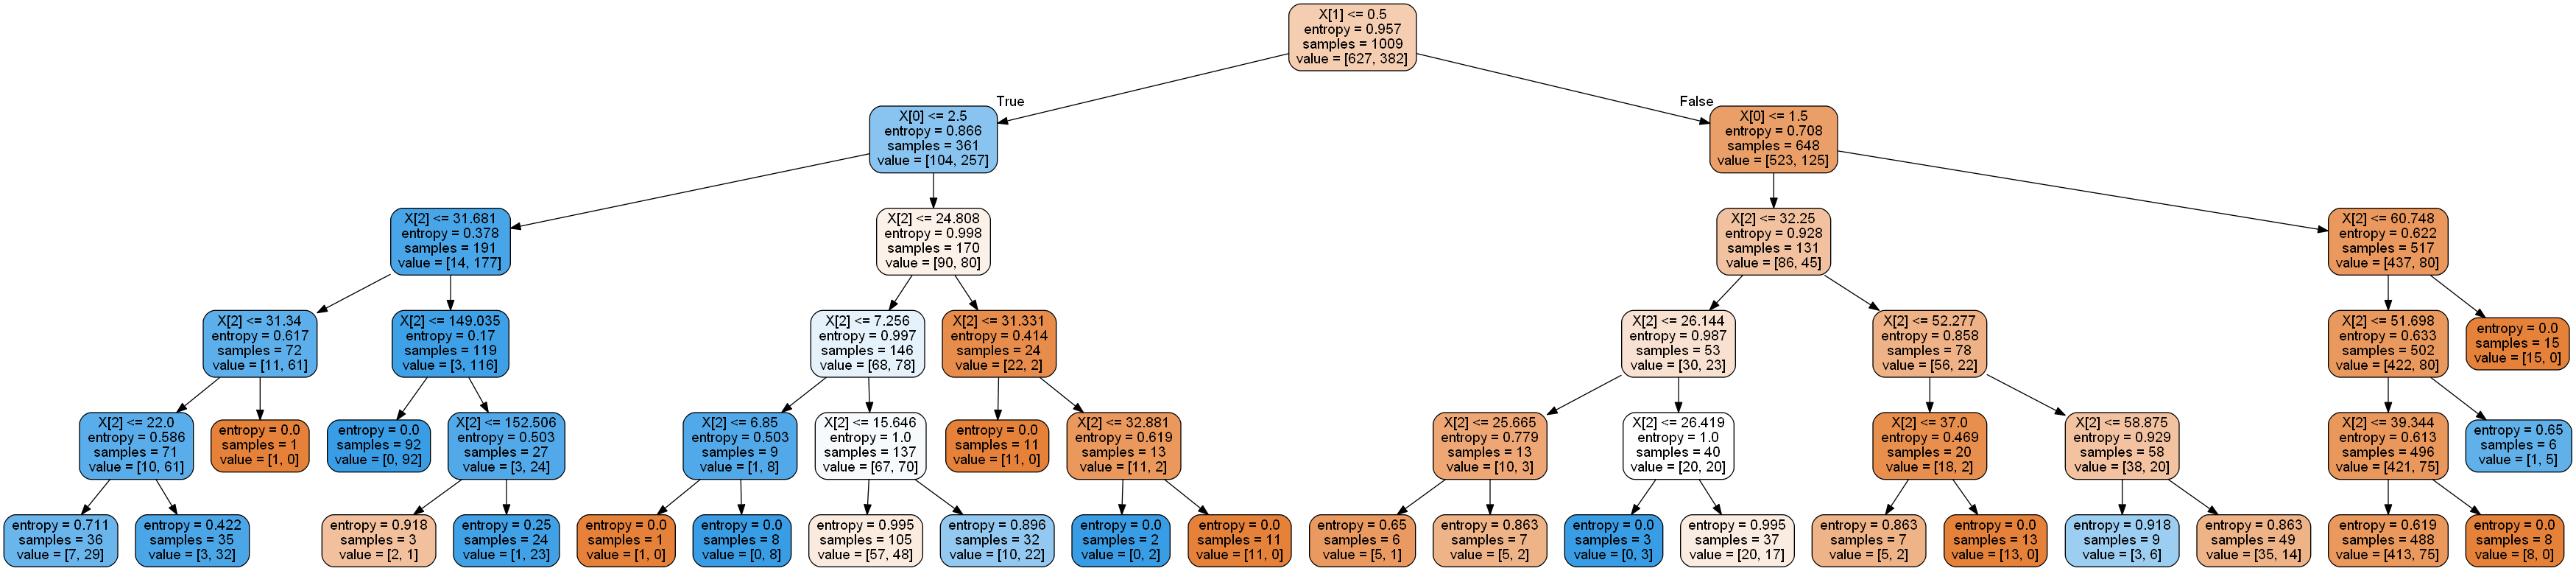

In [203]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())